# Módulo 04 - Análise e Previsão de Séries Temporais

## Bibliotecas Importadas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
#!pip install plotly==4.12.0

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet

In [ ]:
#!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima.model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima.model.ARIMA',
                        FutureWarning)

## Parte 01 - Série Temporal

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv'

dados = pd.read_csv(url, encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=16,
                    engine='python')
dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [ ]:
dados.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
15,2016,7116,6800,8067,7360,7315,7527,6991,7702,7030,6588,7039,6672,86207
16,2017,7481,6803,8680,6780,8091,7394,7225,8110,7447,7809,7451,7020,90291
17,2018,7881,6821,7901,8121,7892,7720,8109,8934,7663,8701,7711,6900,94354
18,2019,8392,7754,7648,8274,8383,7363,8382,8239,8143,8592,7615,7220,96005
19,Total,142969,129386,149875,143199,143264,133444,141800,149952,140241,144870,136864,128893,1684757


In [ ]:
# remove a coluna Total
dados = dados.drop('Total', axis=1)

# remove a linha Total
dados = dados.drop(dados[dados['Ano Diagnóstico'] == 'Total'].index, axis=0)

dados

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176


In [ ]:
dados_st = dados.melt(id_vars='Ano Diagnóstico', value_name='Casos', var_name='Mês')
dados_st.head()

,Ano Diagnóstico,Mês,Casos
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432


In [ ]:
dados_st['data'] = dados_st['Ano Diagnóstico'] + '-' + dados_st['Mês']
dados_st.head()

,Ano Diagnóstico,Mês,Casos,data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan


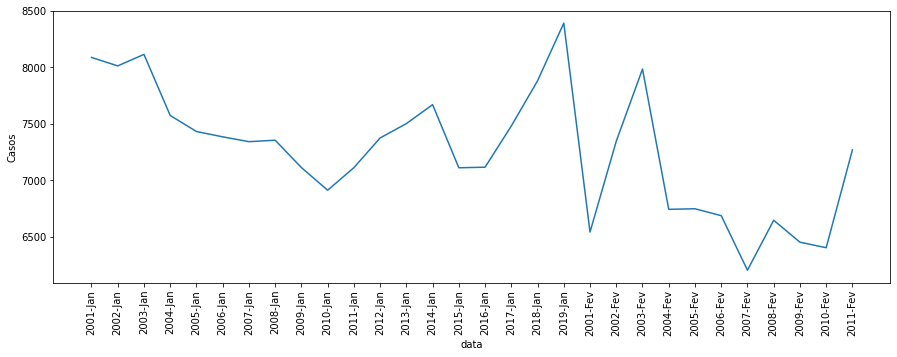

In [ ]:
plt.figure(figsize=(15,5))

sns.lineplot(x='data', y='Casos', data=dados_st[:30])
plt.xticks(rotation=90)

plt.show();

In [ ]:
dados_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano Diagnóstico  228 non-null    object
 1   Mês              228 non-null    object
 2   Casos            228 non-null    int64 
 3   data             228 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.2+ KB


### Desafio 01 - Formato Ano-Mês

Transformar os dados em uma série temporal no formato ano-mes

In [ ]:
aux = dados.copy()
aux = aux.melt(id_vars=['Ano Diagnóstico'],
           var_name='mes',
           value_name='casos')

aux.head()

,Ano Diagnóstico,mes,casos
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432


In [ ]:
#adicionando coluna com ano/mês
def get_ano_mes(row):
    return f'{row["Ano Diagnóstico"]}-{row["mes"]}'

aux['ano_mes'] = aux.apply(lambda row : get_ano_mes(row), axis=1)
aux.head()

,Ano Diagnóstico,mes,casos,ano_mes
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan


### Desafio 02 - Convertendo a data

Converter a data (string) em Datetime

In [ ]:
dados_st['Mês'].unique()

array(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set',
       'Out', 'Nov', 'Dez'], dtype=object)

In [ ]:
aux = dados_st.copy()
mes_nros = dict([(x1, str(x0+1).rjust(2,"0")) for x0, x1 in enumerate(dados_st['Mês'].unique().tolist())]) 

aux['Mês'] = aux['Mês'].replace(to_replace=mes_nros)

aux['data'] = aux['Ano Diagnóstico'] + '-' + aux['Mês']
aux['data'] = pd.to_datetime(aux['data'], format='%Y-%m')
aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ano Diagnóstico  228 non-null    object        
 1   Mês              228 non-null    object        
 2   Casos            228 non-null    int64         
 3   data             228 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.2+ KB


## Parte 02 - Manipulação de datas

In [ ]:
meses_port_ing = {
    'Jan': 'Jan',
    'Fev': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'Mai': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Set': 'Sep',
    'Out': 'Oct',
    'Nov': 'Nov',
    'Dez': 'Dec'
}

dados_st['Mês'] = dados_st['Mês'].map(meses_port_ing)
dados_st.sample(10)

,Ano Diagnóstico,Mês,Casos,data
127,2014,Jul,7516,2014-Jul
102,2008,Jun,6929,2008-Jun
208,2019,Nov,7615,2019-Nov
106,2012,Jun,6787,2012-Jun
187,2017,Oct,7809,2017-Out
220,2012,Dec,6302,2012-Dez
110,2016,Jun,7527,2016-Jun
171,2001,Oct,7524,2001-Out
90,2015,May,6893,2015-Mai
157,2006,Sep,6793,2006-Set


In [ ]:
dados_st['data'] = dados_st['Ano Diagnóstico'] + '-' + dados_st['Mês']
dados_st['Data'] = pd.to_datetime(dados_st['data'])
dados_st.head()

,Ano Diagnóstico,Mês,Casos,data,Data
0,2001,Jan,8088,2001-Jan,2001-01-01
1,2002,Jan,8013,2002-Jan,2002-01-01
2,2003,Jan,8115,2003-Jan,2003-01-01
3,2004,Jan,7574,2004-Jan,2004-01-01
4,2005,Jan,7432,2005-Jan,2005-01-01


In [ ]:
dados_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ano Diagnóstico  228 non-null    object        
 1   Mês              228 non-null    object        
 2   Casos            228 non-null    int64         
 3   data             228 non-null    object        
 4   Data             228 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 9.0+ KB


In [ ]:
dados_st = dados_st[['Data', 'Casos']]
dados_st = dados_st.sort_values(by='Data')
dados_st.head()

,Data,Casos
0,2001-01-01,8088
19,2001-02-01,6542
38,2001-03-01,8095
57,2001-04-01,7305
76,2001-05-01,7656


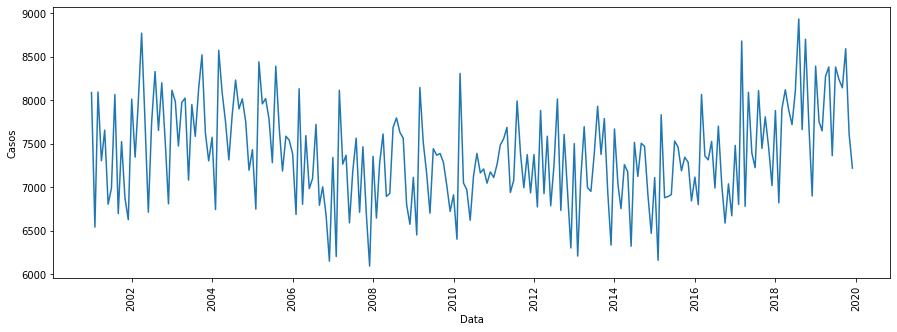

In [ ]:
plt.figure(figsize=(15,5))

sns.lineplot(x='Data', y='Casos', data=dados_st)
plt.xticks(rotation=90)

plt.show();

### Desafio 03 - Casos de Hanseníase

Realizar os mesmos processos de transformação de Série Temporal, para a base de dados de Hanseníase



In [ ]:
url = 'https://raw.githubusercontent.com/marcelagomescorrea/bootcamp_alura/main/Modulo_04/datasets/casos_hanseniase.csv'
dados_hanseniase = pd.read_csv(url, encoding='ISO-8859-1', sep=';', skiprows=4, skipfooter=10,
                    engine='python')
dados_hanseniase.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,4107,4103,4787,4135,4724,3940,4116,4890,4035,4728,4197,3250,51012
1,2002,3982,4065,4566,5027,4663,4488,4971,5281,4805,5151,4679,3545,55223
2,2003,4127,5918,5555,4965,5013,4476,4655,4844,5249,5257,4737,3874,58670
3,2004,4168,4169,5612,4557,5440,5299,4975,5640,4825,4233,4520,3925,57363
4,2005,4078,4241,4998,4628,4706,4559,4154,5457,4853,5196,5008,4209,56087


In [ ]:
meses_port_ing = {
    'Jan': 'Jan', 'Fev': 'Feb',  'Mar': 'Mar', 'Abr': 'Apr',
    'Mai': 'May', 'Jun': 'Jun', 'Jul': 'Jul', 'Ago': 'Aug',
    'Set': 'Sep', 'Out': 'Oct', 'Nov': 'Nov', 'Dez': 'Dec'
}

def transforma_to_st(dados):
    dados_st = dados.copy()
    # remove coluna Total (se tiver)
    if 'Total' in dados_st.columns:
        dados_st = dados_st.drop('Total', axis=1)
    
    if any(dados_st['Ano Diagnóstico'] == 'Total'):
        dados_st.drop(dados_st[dados_st['Ano Diagnóstico'] == 'Total'].index,
                      axis=0, inplace=True)

    dados_st = dados_st.melt(id_vars='Ano Diagnóstico', value_name='Casos',
                             var_name='Mês')

    dados_st['Mês'] = dados_st['Mês'].map(meses_port_ing)
    dados_st['DataStr'] = dados_st['Ano Diagnóstico'] + '-' + dados_st['Mês']
    dados_st['Data'] = pd.to_datetime(dados_st['DataStr'])

    dados_st = dados_st.sort_values(by='Data').reset_index(drop=True)

    return dados_st[['Data', 'Casos']]

In [ ]:
dados_hans_st = transforma_to_st(dados_hanseniase)

display(print(dados_hans_st.info()))
dados_hans_st.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    228 non-null    datetime64[ns]
 1   Casos   228 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.7 KB
None


None

,Data,Casos
189,2016-10-01,2644
12,2002-01-01,3982
90,2008-07-01,4498
158,2014-03-01,2903
190,2016-11-01,2528


### Desafio 04 - Embelezando o gráfico

Deixar o nosso gráfico da série temporal bonitão.

In [ ]:
def plot_line_st(dados_st, doenca, x='Data', y='Casos', with_range_slider=True, meses='4'):
    intervalo_dif = (dados_st[x].max() - dados_st[x].min())/4
    range_x = [dados_st[x].min() + intervalo_dif,
               dados_st[x].max() - intervalo_dif]

    fig = px.line(dados_st, x=x, y=y)

    # Ajustes na imagem
    fig.update_layout(
        title = f'Casos de <b>{doenca}</b> ao longo dos anos',
        title_font = dict(size=18),
        yaxis_title_text = 'Casos',
        xaxis_title_text = 'Mês/Ano',

        template = 'plotly_white',
        autosize = False,
        width = 1000,
        height = 500,
    )
    # Ajustes no eixo Y
    fig.update_yaxes(range=(dados_st[y].min(), dados_st[y].max()))

    # Ajustes no eixo X
    fig.update_xaxes(
        dtick="M"+meses,
        tickformat="%b\n%Y",
        ticklabelmode="period")
    
    if with_range_slider:
        fig.update_xaxes(
            range=range_x,
            rangeslider_visible=True,
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")
                ]))
        )

    fig.show()

In [ ]:
plot_line_st(dados_hans_st, 'Hanseníase')

In [ ]:
plot_line_st(dados_st, 'Tuberculose')

## Parte 03 - Iniciando a Análise de Série Temporal

In [ ]:
dados_st = dados_st.sort_values(by='Data').reset_index(drop=True)

In [ ]:
dados_st['Media_Movel_3'] = dados_st['Casos'].rolling(3).mean()

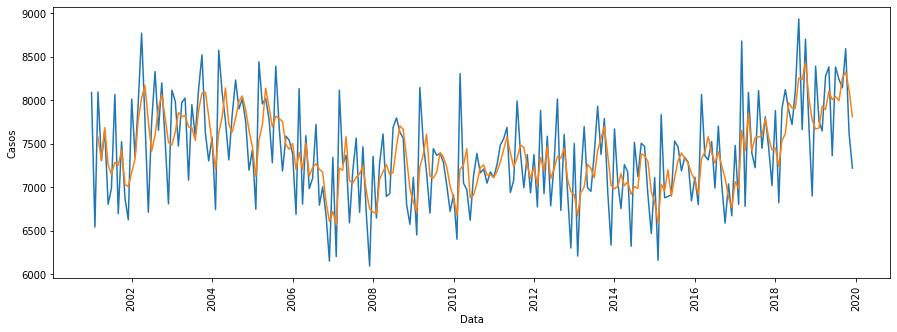

In [ ]:
plt.figure(figsize=(15,5))

sns.lineplot(x='Data', y='Casos', data=dados_st)
sns.lineplot(x='Data', y='Media_Movel_3', data=dados_st)
plt.xticks(rotation=90)

plt.show();

In [ ]:
dados_st['Media_Movel_6'] = dados_st['Casos'].rolling(6).mean()

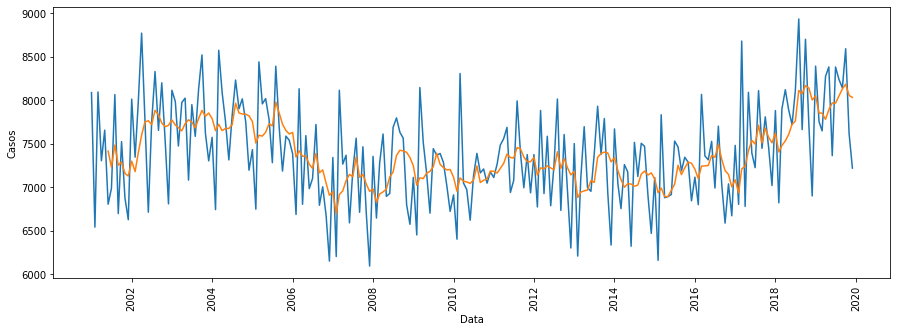

In [ ]:
plt.figure(figsize=(15,5))

sns.lineplot(x='Data', y='Casos', data=dados_st)
sns.lineplot(x='Data', y='Media_Movel_6', data=dados_st)
plt.xticks(rotation=90)

plt.show();

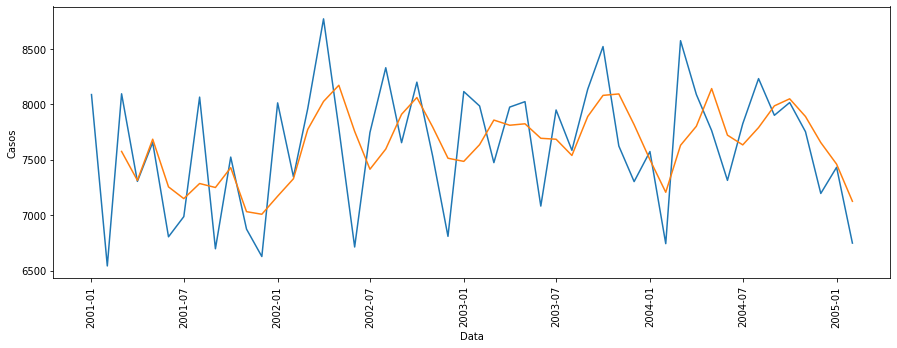

In [ ]:
plt.figure(figsize=(15,5))

sns.lineplot(x='Data', y='Casos', data=dados_st[:50])
sns.lineplot(x='Data', y='Media_Movel_3', data=dados_st[:50])
plt.xticks(rotation=90)

plt.show();

In [ ]:
dados_st['Media_Movel_3c'] = dados_st['Casos'].rolling(3, center=True).mean()

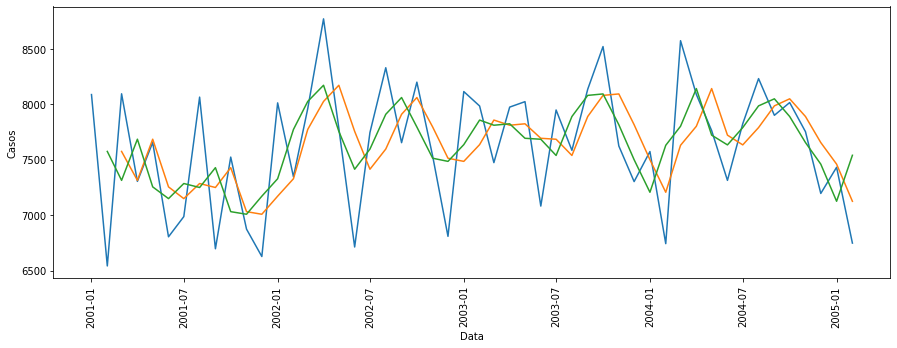

In [ ]:
plt.figure(figsize=(15,5))

sns.lineplot(x='Data', y='Casos', data=dados_st[:50])
sns.lineplot(x='Data', y='Media_Movel_3', data=dados_st[:50])
sns.lineplot(x='Data', y='Media_Movel_3c', data=dados_st[:50])
plt.xticks(rotation=90)

plt.show();

### Desafio 05 - Outra Média Móvel

Analisar outras janelas de médias móveis, realizar a análise dessas janelas e compartilhar suas conclusões no Discord. Refletir sobre os impactos de uma suavização com janelas muito grandes.

In [ ]:
dados_hans_st.head()

,Data,Casos
0,2001-01-01,4107
1,2001-02-01,4103
2,2001-03-01,4787
3,2001-04-01,4135
4,2001-05-01,4724


In [ ]:
dados_hans_st['Média Móvel Trimestral'] = dados_hans_st['Casos'].rolling(3, center=True).mean()
dados_hans_st['Média Móvel Semestral'] = dados_hans_st['Casos'].rolling(6, center=True).mean()
dados_hans_st['Média Móvel Anual'] = dados_hans_st['Casos'].rolling(12, center=True).mean()

dados_hans_st.head()

,Data,Casos,Média Móvel Trimestral,Média Móvel Semestral,Média Móvel Anual
0,2001-01-01,4107,NaN,NaN,NaN
1,2001-02-01,4103,4332.333333,NaN,NaN
2,2001-03-01,4787,4341.666667,NaN,NaN
3,2001-04-01,4135,4548.666667,4299.333333,NaN
4,2001-05-01,4724,4266.333333,4300.833333,NaN


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=dados_hans_st['Data'],
                         y=dados_hans_st['Casos'],
                         name='Casos',
                         marker_color='lightsteelblue'))
fig.add_trace(go.Scatter(x=dados_hans_st['Data'],
                         y=dados_hans_st['Média Móvel Trimestral'],
                         name='Média Móvel Trimestral',
                         marker_color='cornflowerblue'))
fig.add_trace(go.Scatter(x=dados_hans_st['Data'],
                         y=dados_hans_st['Média Móvel Semestral'],
                         name='Média Móvel Semestral',
                         marker_color='royalblue'))
fig.add_trace(go.Scatter(x=dados_hans_st['Data'],
                         y=dados_hans_st['Média Móvel Anual'],
                         name='Média Móvel Anual',
                         marker_color='darkblue'))

fig.update_layout(
    title = f'Casos de <b>Hanseníase</b> ao longo dos anos',
    title_font = dict(size=18),
    yaxis_title_text = 'Casos',
    xaxis_title_text = 'Mês/Ano',

    template = 'plotly_white',
    autosize = False,
    width = 2000,
    height = 500,

    legend=dict(title='', orientation="h", y=0.96,
                yanchor="bottom", xanchor="right", x = 1),
)
# Ajustes no eixo Y
fig.update_yaxes(range=(dados_hans_st['Casos'].min(), dados_hans_st['Casos'].max()))
# Ajustes no eixo X
fig.update_xaxes(
    dtick="M4",
    tickformat="%b\n%Y",
    ticklabelmode="period"
)



fig.show()

Analisando o gráfico acima, vemos que com a média móvel anual não há tantos picos/vales e fica mais fácil de identificar a tendência do todo, que aparenta ser uma ligeira queda com algumas 'leves barrigas' (vales).

No entanto, sem os picos e os vales característicos dos números da doença, fica difícil ver sazonalidade, ou zonas onde há um aumento ou uma queda expressivos de casos, o que dificultaria ações em períodos específicos do ano visando diminuir o impacto da doença.

Sendo assim, aprendi que as médias móveis devem ser utilizadas com parcimônia e atenção.

### Desafio 06 - Realizando Previsões

Realizar sua primeira previsão utilizando médias (toda série, 3 últimos meses) ou qualquer outra abordagem do seu interesse.

In [ ]:
dados_hans_st.tail()

,Data,Casos,Média Móvel Trimestral,Média Móvel Semestral,Média Móvel Anual
223,2019-08-01,3107,3007.666667,2962.333333,NaN
224,2019-09-01,3060,3101.333333,2907.000000,NaN
225,2019-10-01,3137,2970.666667,2793.500000,NaN
226,2019-11-01,2715,2579.333333,NaN,NaN
227,2019-12-01,1886,NaN,NaN,NaN


In [ ]:
datas_2020 = ['2020-01-01', '2020-02-01','2020-03-01']

for data in datas_2020:
    casos_media = dados_hans_st.tail(3)['Casos'].mean()
    new = { 'Data':  pd.to_datetime(data), 'Casos': casos_media }
    dados_hans_st = dados_hans_st.append(new, ignore_index=True)

dados_hans_st.tail()

,Data,Casos,Média Móvel Trimestral,Média Móvel Semestral,Média Móvel Anual
226,2019-11-01,2715.000000,2579.333333,NaN,NaN
227,2019-12-01,1886.000000,NaN,NaN,NaN
228,2020-01-01,2579.333333,NaN,NaN,NaN
229,2020-02-01,2393.444444,NaN,NaN,NaN
230,2020-03-01,2286.259259,NaN,NaN,NaN


In [ ]:
dados_hans_st[-3:]

,Data,Casos,Média Móvel Trimestral,Média Móvel Semestral,Média Móvel Anual
228,2020-01-01,2579.333333,NaN,NaN,NaN
229,2020-02-01,2393.444444,NaN,NaN,NaN
230,2020-03-01,2286.259259,NaN,NaN,NaN


In [ ]:
fig = go.Figure()

previsao = dados_hans_st[-3:]

fig.add_trace(go.Scatter(x=dados_hans_st['Data'],
                         y=dados_hans_st['Casos'],
                         name='Casos',
                         marker_color='cornflowerblue',
                         mode='lines+markers',
                         connectgaps=True))
fig.add_trace(go.Scatter(x=previsao['Data'],
                         y=previsao['Casos'],
                         name='Previsão',
                         marker_color='red',
                         mode='lines+markers',
                         connectgaps=True))

fig.update_layout(
    title = f'Casos de <b>Hanseníase</b> ao longo dos anos com previsão',
    title_font = dict(size=18),
    yaxis_title_text = 'Casos',
    xaxis_title_text = 'Mês/Ano',

    template = 'plotly_white',
    autosize = False,
    width = 2000,
    height = 500,

    legend=dict(title='', orientation="h", y=0.96,
                yanchor="bottom", xanchor="right", x = 1),
)
# Ajustes no eixo Y
fig.update_yaxes(range=(dados_hans_st['Casos'].min()-500,
                        dados_hans_st['Casos'].max()+500))
# Ajustes no eixo X
fig.update_xaxes(
    range=(dados_hans_st['Data'].min() - pd.DateOffset(months=4),
           dados_hans_st['Data'].max() + pd.DateOffset(months=4)),
    dtick="M4",
    tickformat="%b\n%Y",
    ticklabelmode="period"
)



fig.show()

## Parte 04 - Decomposição e Autocorrelação

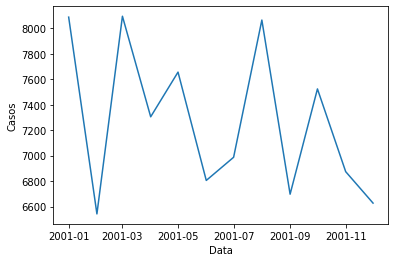

In [ ]:
sns.lineplot(x='Data', y='Casos', data=dados_st[:12]);

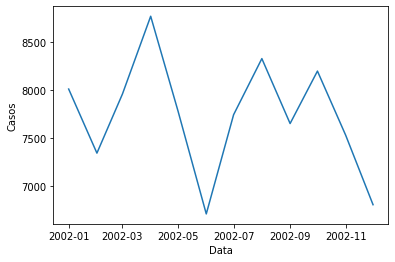

In [ ]:
sns.lineplot(x='Data', y='Casos', data=dados_st[12:24]);

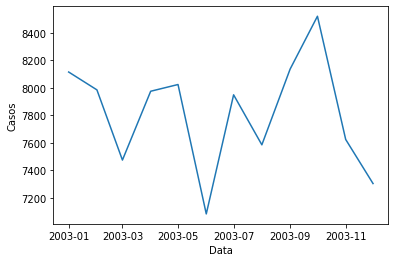

In [ ]:
sns.lineplot(x='Data', y='Casos', data=dados_st[24:36]);

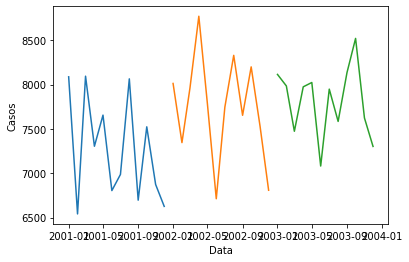

In [ ]:
sns.lineplot(x='Data', y='Casos', data=dados_st[:12])
sns.lineplot(x='Data', y='Casos', data=dados_st[12:24])
sns.lineplot(x='Data', y='Casos', data=dados_st[24:36]);

In [ ]:
dados_st['Ano'] = dados_st['Data'].dt.year
dados_st['Mês'] = dados_st['Data'].dt.month

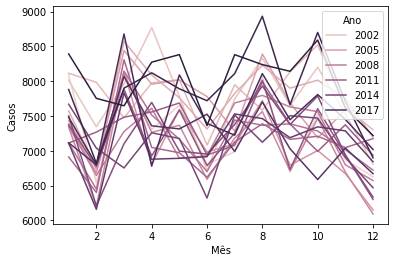

In [ ]:
sns.lineplot(x='Mês', y='Casos', data=dados_st, hue='Ano');

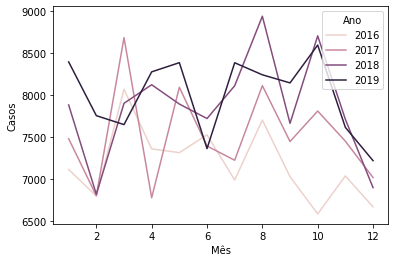

In [ ]:
sns.lineplot(x='Mês', y='Casos', data=dados_st.query('Ano in [2019, 2018, 2017, 2016]'), hue='Ano');

In [ ]:
decomposicao = seasonal_decompose(dados_st[['Data', 'Casos']].set_index('Data'))

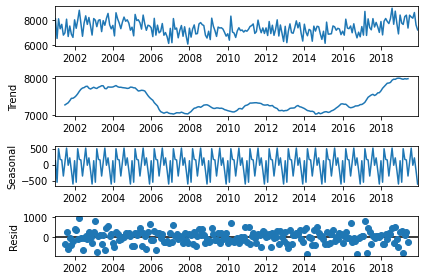

In [ ]:
decomposicao.plot();

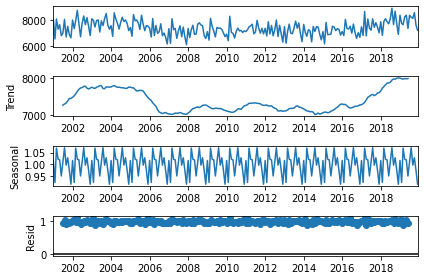

In [ ]:
decomposicao = seasonal_decompose(dados_st[['Data', 'Casos']].set_index('Data'), model='multiplicative')
decomposicao.plot();

In [ ]:
url_passageiros = 'https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/AirPassengers.csv'

dados_passageiros = pd.read_csv(url_passageiros)
dados_passageiros.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
dados_passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
dados_passageiros['Month'] = pd.to_datetime(dados_passageiros['Month'])
dados_passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


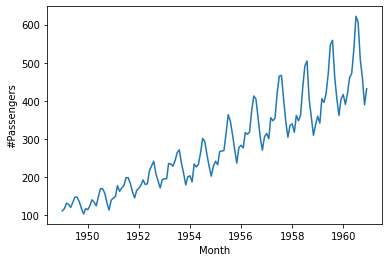

In [ ]:
sns.lineplot(x='Month', y='#Passengers', data=dados_passageiros);

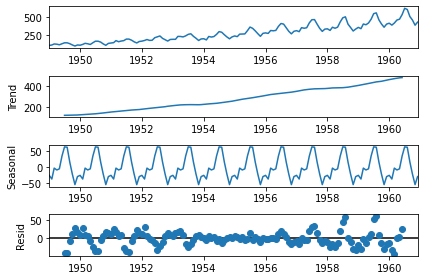

In [ ]:
decomposicao_p= seasonal_decompose(dados_passageiros.set_index('Month'))
decomposicao_p.plot();

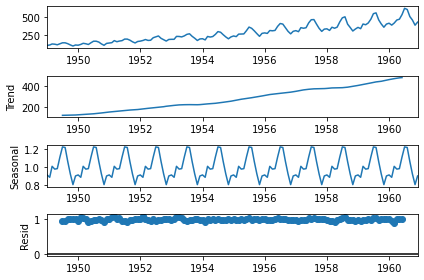

In [ ]:
decomposicao_p = seasonal_decompose(dados_passageiros.set_index('Month'), model='multiplicative')
decomposicao_p.plot();

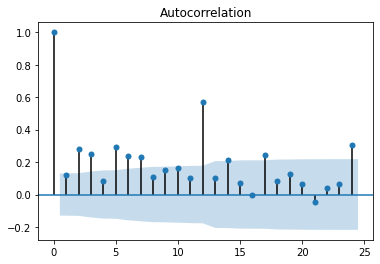

In [ ]:
plot_acf(dados_st['Casos']);

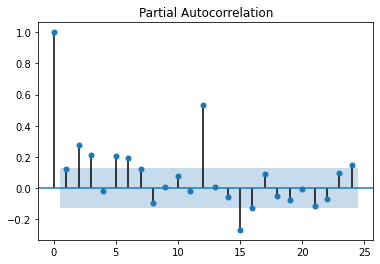

In [ ]:
plot_pacf(dados_st['Casos']);

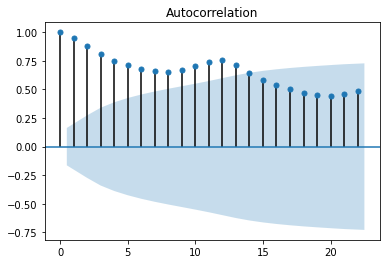

In [ ]:
plot_acf(dados_passageiros['#Passengers']);

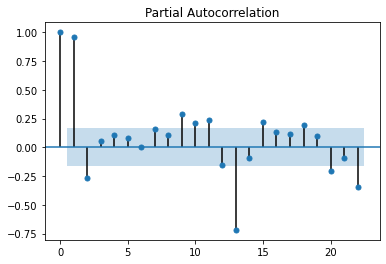

In [ ]:
plot_pacf(dados_passageiros['#Passengers']);

### Desafio 07 - Index e Slice com Datas

Transformar as datas em index e realizar os slides pelas datas

In [ ]:
dados_hans_st.head()

,Data,Casos,Média Móvel Trimestral,Média Móvel Semestral,Média Móvel Anual
0,2001-01-01,4107.0,NaN,NaN,NaN
1,2001-02-01,4103.0,4332.333333,NaN,NaN
2,2001-03-01,4787.0,4341.666667,NaN,NaN
3,2001-04-01,4135.0,4548.666667,4299.333333,NaN
4,2001-05-01,4724.0,4266.333333,4300.833333,NaN


In [ ]:
dados_hans_st = dados_hans_st.set_index('Data')
dados_hans_st.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 231 entries, 2001-01-01 to 2020-03-01
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Casos                   231 non-null    float64
 1   Média Móvel Trimestral  226 non-null    float64
 2   Média Móvel Semestral   223 non-null    float64
 3   Média Móvel Anual       217 non-null    float64
dtypes: float64(4)
memory usage: 9.0 KB


In [ ]:
plot_line_st(dados_st=dados_hans_st['2016-01-01':'2019-12-01'].reset_index(),
             doenca='Hanseníase', with_range_slider=False)

### Desafio 08 - Embelezando a decomposição

Formatar os gráficos de decomposição, colocar título e modificar os tamanhos. Realizar a decomposição de outras séries temporais.

In [ ]:
dados_passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
def plot_seasonal_decompose_with_plotly(decomposicao, x_title, titulo, apenas_tendencia=False):
    fig = go.Figure()

    if not apenas_tendencia:
        fig = make_subplots(rows=4, cols=1, x_title=x_title)

    ##### Observado
    observado = go.Scatter(x=decomposicao.observed.index, y=decomposicao.observed,
                             showlegend=apenas_tendencia, name='Observado')
    if not apenas_tendencia:
        fig.add_trace(observado, row=1, col=1)
        fig.update_yaxes(title='Observado', row=1, col=1)
    else:
        fig.add_trace(observado)

    
    ##### Tendência
    tendencia = go.Scatter(x=decomposicao.trend.index, y=decomposicao.trend,
                             showlegend=apenas_tendencia, name='Tendência')
    if not apenas_tendencia:
        fig.add_trace(tendencia, row=2, col=1)
        fig.update_yaxes(title='Tendência', row=2, col=1)
    else:
        fig.add_trace(tendencia)
        fig.update_xaxes(title=x_title)

    ##### Sazonal
    if not apenas_tendencia:
        fig.add_trace(go.Scatter(x=decomposicao.seasonal.index,
                                 y=decomposicao.seasonal,
                                 showlegend=False, name='Sazonal'), row=3, col=1)
        fig.update_yaxes(title='Sazonal', row=3, col=1)

    ##### Resíduo
    if not apenas_tendencia:
        fig.add_trace(go.Scatter(x=decomposicao.resid.index,
                                 y=decomposicao.resid,
                                 showlegend=False, name='Resíduo'), row=4, col=1)
        fig.update_yaxes(title='Resíduo', row=4, col=1)


    fig.update_layout(
        title = f'Decomposição da série - <b>{titulo}</b>',
        title_font = dict(size=18),

        template = 'plotly_white',
        autosize = False,
        width = 1000,
        height = 600,
    )

    fig.show()

In [ ]:
dados_hans_st.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 231 entries, 2001-01-01 to 2020-03-01
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Casos                   231 non-null    float64
 1   Média Móvel Trimestral  226 non-null    float64
 2   Média Móvel Semestral   223 non-null    float64
 3   Média Móvel Anual       217 non-null    float64
dtypes: float64(4)
memory usage: 19.0 KB


In [ ]:
decomposicao_hans = seasonal_decompose(dados_hans_st[['Casos']])

In [ ]:
plot_seasonal_decompose_with_plotly(decomposicao=decomposicao_hans,
                                    titulo='Casos de Hanseníase',
                                    x_title='Mês/Ano',
                                    apenas_tendencia=True)

In [ ]:
plot_seasonal_decompose_with_plotly(decomposicao=decomposicao_hans,
                                    titulo='Casos de Hanseníase',
                                    x_title='Mês/Ano',
                                    apenas_tendencia=False)

### Desafio 09 - Casos de COVID

Realizar uma análise de autocorrelação e autocorrelação parcial dos casos de COVID-19.

In [ ]:
path = 'https://github.com/marcelagomescorrea/bootcamp_alura/blob/main/Modulo_04/datasets/casos_covid.zip?raw=true'
dados_covid = pd.read_csv(path, sep=';', engine='python', compression='zip')
dados_covid.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN


In [ ]:
# filtrando dados apenas do Brasil
dados_covid = dados_covid[['data', 'casosNovos', 'obitosNovos']].iloc[:327]
dados_covid.tail()

,data,casosNovos,obitosNovos
322,2021-01-11,25822,480
323,2021-01-12,64025,1110
324,2021-01-13,60899,1274
325,2021-01-13,0,0
326,2021-01-14,67758,1131


In [ ]:
dados_covid['data'] = pd.to_datetime(dados_covid['data'])
dados_covid.head()

,data,casosNovos,obitosNovos
0,2020-02-25,0,0
1,2020-02-26,1,0
2,2020-02-27,0,0
3,2020-02-28,0,0
4,2020-02-29,1,0


In [ ]:
plot_line_st(dados_covid, 'COVID', x='data', y='casosNovos', with_range_slider=False, meses='1')

In [ ]:
dados_covid['data'].value_counts()

2020-12-24    2
2021-01-13    2
2020-03-13    1
2020-09-14    1
2020-05-30    1
             ..
2020-05-29    1
2020-04-28    1
2020-03-28    1
2020-02-26    1
2020-12-31    1
Name: data, Length: 325, dtype: int64

In [ ]:
dados_covid[dados_covid['data'] == '2020-12-24']

,data,casosNovos,obitosNovos
303,2020-12-24,60076,786
304,2020-12-24,0,0


In [ ]:
dados_covid[dados_covid['data'] == '2021-01-13']

,data,casosNovos,obitosNovos
324,2021-01-13,60899,1274
325,2021-01-13,0,0


In [ ]:
dados_covid = dados_covid.drop(index=[304, 325])
dados_covid['data'].value_counts()

2020-03-13    1
2020-08-28    1
2020-05-30    1
2020-04-29    1
2020-03-29    1
             ..
2020-05-29    1
2020-04-28    1
2020-03-28    1
2020-02-26    1
2020-12-31    1
Name: data, Length: 325, dtype: int64

In [ ]:
dados_covid = dados_covid.set_index('data').asfreq('d')
dados_covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 2020-02-25 to 2021-01-14
Freq: D
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   casosNovos   325 non-null    int64
 1   obitosNovos  325 non-null    int64
dtypes: int64(2)
memory usage: 7.6 KB


In [ ]:
decomposicao_covid = seasonal_decompose(dados_covid[['casosNovos']])

In [ ]:
plot_seasonal_decompose_with_plotly(decomposicao=decomposicao_covid,
                                    titulo='Casos de COVID',
                                    x_title='Dia',
                                    apenas_tendencia=True)

In [ ]:
plot_seasonal_decompose_with_plotly(decomposicao=decomposicao_covid,
                                    titulo='Casos de COVID',
                                    x_title='Dia',
                                    apenas_tendencia=False)

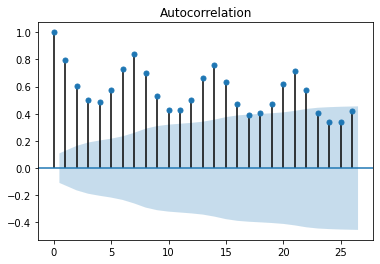

In [ ]:
plot_acf(dados_covid['casosNovos']);

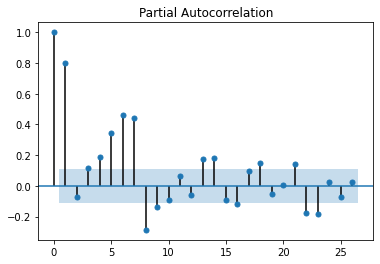

In [ ]:
plot_pacf(dados_covid['casosNovos']);

## Parte 05 - Previsões em Séries Temporais

In [ ]:
dados_passageiros = dados_passageiros.rename({'Month': 'Data', '#Passengers': 'Passageiros'}, axis=1)
dados_passageiros.head()

,Data,Passageiros
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
dados_passageiros['Mês'] = dados_passageiros['Data'].dt.month
dados_passageiros['Ano'] = dados_passageiros['Data'].dt.year
dados_passageiros.head()

,Data,Passageiros,Mês,Ano
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949


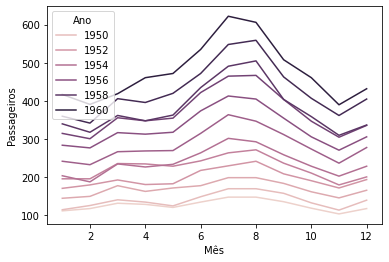

In [ ]:
sns.lineplot(x='Mês', y='Passageiros', data=dados_passageiros, hue='Ano');

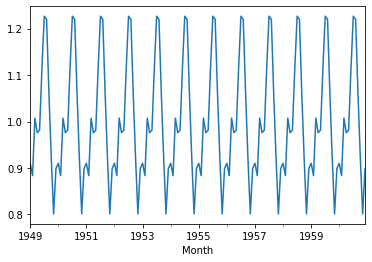

In [ ]:
decomposicao_p.seasonal.plot();

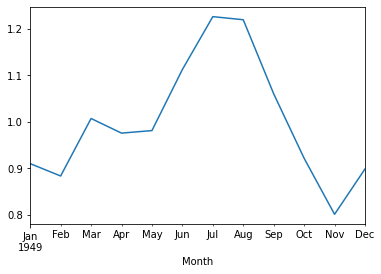

In [ ]:
decomposicao_p.seasonal[:12].plot();

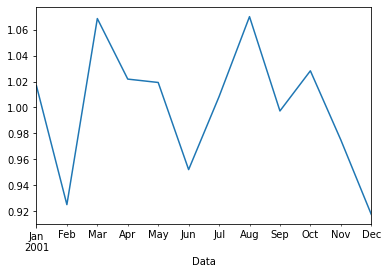

In [ ]:
decomposicao.seasonal[:12].plot();

In [ ]:
modelo_arima = ARIMA(dados_st['Casos'].values.astype('float32'), order=[0,0,0])
modelo_arima_treinado = modelo_arima.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




In [ ]:
modelo_arima_treinado.forecast(steps=12)[0] # previsões

array([7389.2850867, 7389.2850867, 7389.2850867, 7389.2850867,
       7389.2850867, 7389.2850867, 7389.2850867, 7389.2850867,
       7389.2850867, 7389.2850867, 7389.2850867, 7389.2850867])

In [ ]:
dados_treino = dados_st.query('Ano != 2019')
dados_teste = dados_st.query('Ano == 2019')

modelo_arima = ARIMA(dados_treino['Casos'].values.astype('float32'), order=[0,0,0])
modelo_arima_treinado = modelo_arima.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




In [ ]:
previsao = modelo_arima_treinado.forecast(steps=12)[0]
previsao

array([7355.33333559, 7355.33333559, 7355.33333559, 7355.33333559,
       7355.33333559, 7355.33333559, 7355.33333559, 7355.33333559,
       7355.33333559, 7355.33333559, 7355.33333559, 7355.33333559])

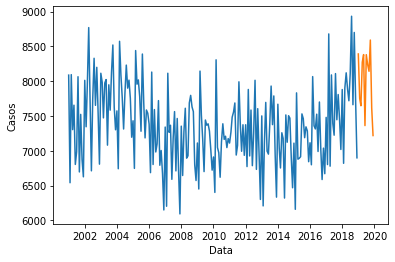

In [ ]:
sns.lineplot(x='Data', y='Casos', data=dados_treino)
sns.lineplot(x='Data', y='Casos', data=dados_teste);

In [ ]:
dados_teste['previsao'] = previsao

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



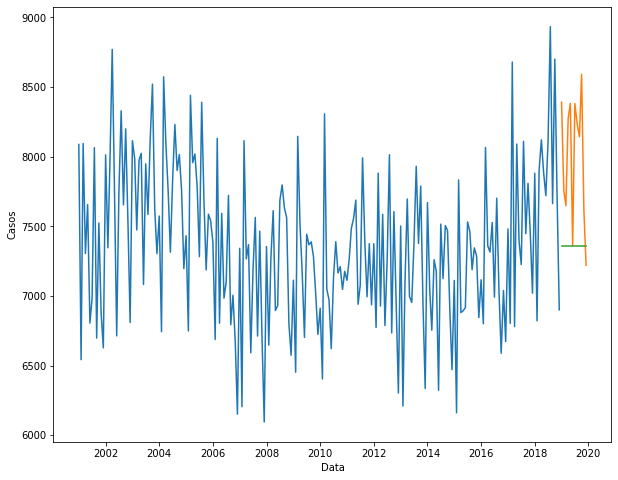

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Data', y='Casos', data=dados_treino)
sns.lineplot(x='Data', y='Casos', data=dados_teste)
sns.lineplot(x='Data', y='previsao', data=dados_teste);

In [ ]:
dados_treino = dados_st.query('Ano != 2019')
dados_teste = dados_st.query('Ano == 2019')

modelo_arima = ARIMA(dados_treino['Casos'].values.astype('float32'), order=[1,0,0])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



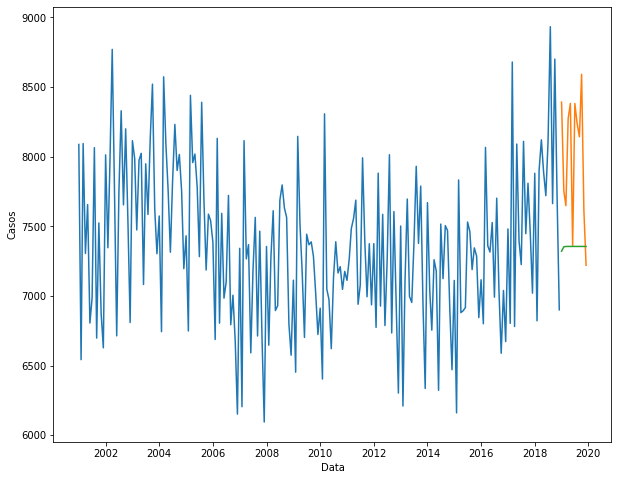

In [ ]:
dados_teste['previsao'] = previsao

plt.figure(figsize=(10,8))
sns.lineplot(x='Data', y='Casos', data=dados_treino)
sns.lineplot(x='Data', y='Casos', data=dados_teste)
sns.lineplot(x='Data', y='previsao', data=dados_teste);

In [ ]:
dados_treino = dados_st.query('Ano != 2019')
dados_teste = dados_st.query('Ano == 2019')

modelo_arima = ARIMA(dados_treino['Casos'].values.astype('float32'), order=[0,0,1])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



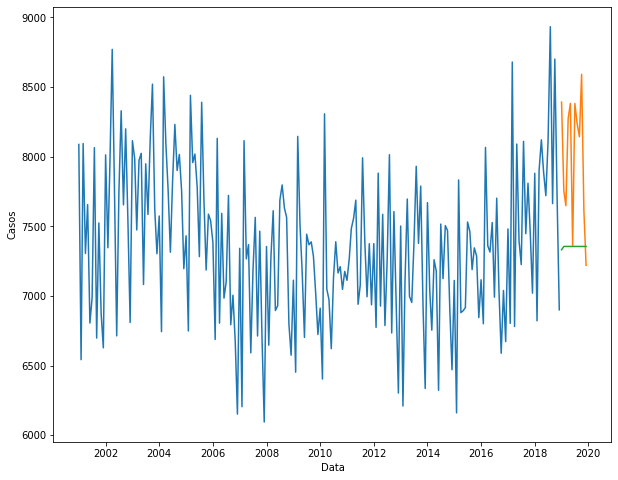

In [ ]:
dados_teste['previsao'] = previsao

plt.figure(figsize=(10,8))
sns.lineplot(x='Data', y='Casos', data=dados_treino)
sns.lineplot(x='Data', y='Casos', data=dados_teste)
sns.lineplot(x='Data', y='previsao', data=dados_teste);

In [ ]:
dados_treino = dados_st.query('Ano != 2019')
dados_teste = dados_st.query('Ano == 2019')

modelo_arima = ARIMA(dados_treino['Casos'].values.astype('float32'), order=[0,1,1])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



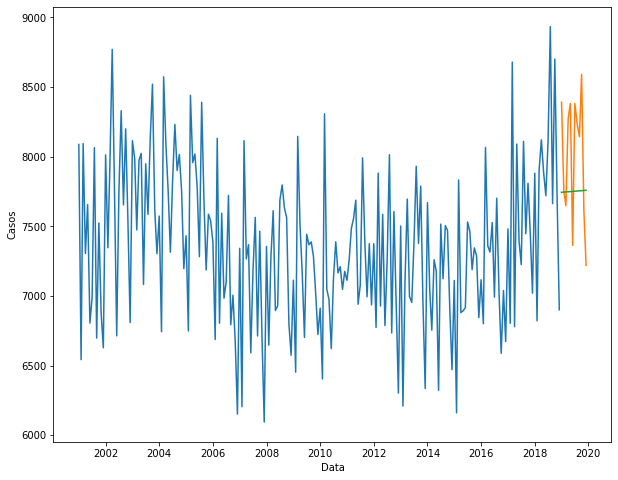

In [ ]:
dados_teste['previsao'] = previsao

plt.figure(figsize=(10,8))
sns.lineplot(x='Data', y='Casos', data=dados_treino)
sns.lineplot(x='Data', y='Casos', data=dados_teste)
sns.lineplot(x='Data', y='previsao', data=dados_teste);

In [ ]:
dados_treino_p = dados_passageiros.query('Ano != 1960')
dados_teste_p = dados_passageiros.query('Ano == 1960')

modelo_arima = ARIMA(dados_treino_p['Passageiros'].values.astype('float32'), order=[0,0,0])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



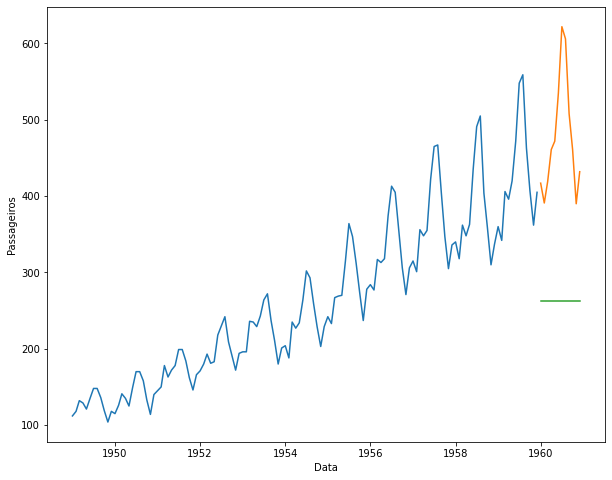

In [ ]:
dados_teste_p['previsao'] = previsao

plt.figure(figsize=(10,8))
sns.lineplot(x='Data', y='Passageiros', data=dados_treino_p)
sns.lineplot(x='Data', y='Passageiros', data=dados_teste_p)
sns.lineplot(x='Data', y='previsao', data=dados_teste_p);

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

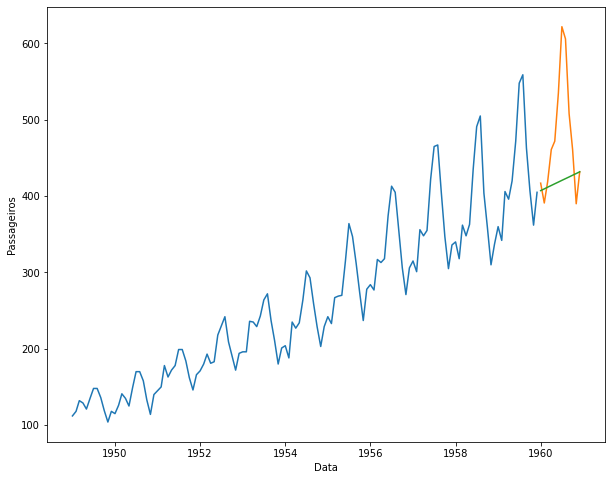

In [ ]:
dados_treino_p = dados_passageiros.query('Ano != 1960')
dados_teste_p = dados_passageiros.query('Ano == 1960')

modelo_arima = ARIMA(dados_treino_p['Passageiros'].values.astype('float32'), order=[0,1,0])
modelo_arima_treinado = modelo_arima.fit()


dados_teste_p['previsao'] = modelo_arima_treinado.forecast(12)[0]

plt.figure(figsize=(10,8))
sns.lineplot(x='Data', y='Passageiros', data=dados_treino_p)
sns.lineplot(x='Data', y='Passageiros', data=dados_teste_p)
sns.lineplot(x='Data', y='previsao', data=dados_teste_p);

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

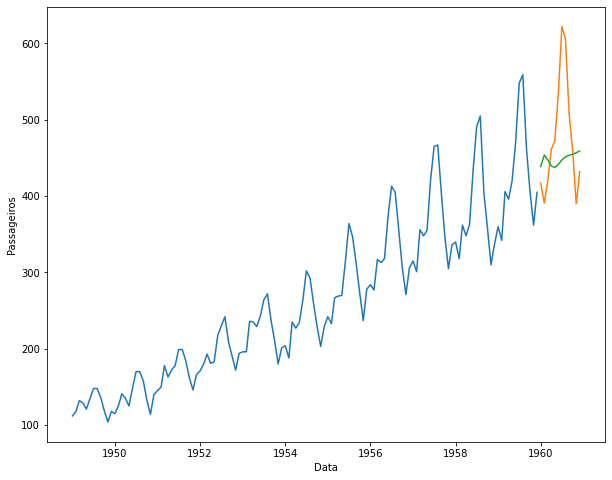

In [ ]:
dados_treino_p = dados_passageiros.query('Ano != 1960')
dados_teste_p = dados_passageiros.query('Ano == 1960')

modelo_arima = ARIMA(dados_treino_p['Passageiros'].values.astype('float32'), order=[3,1,0])
modelo_arima_treinado = modelo_arima.fit()


dados_teste_p['previsao'] = modelo_arima_treinado.forecast(12)[0]

plt.figure(figsize=(10,8))
sns.lineplot(x='Data', y='Passageiros', data=dados_treino_p)
sns.lineplot(x='Data', y='Passageiros', data=dados_teste_p)
sns.lineplot(x='Data', y='previsao', data=dados_teste_p);

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.m

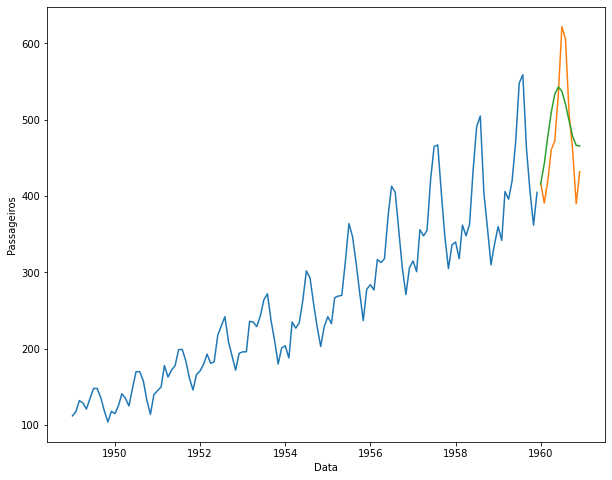

In [ ]:
dados_treino_p = dados_passageiros.query('Ano != 1960')
dados_teste_p = dados_passageiros.query('Ano == 1960')

modelo_arima = ARIMA(dados_treino_p['Passageiros'].values.astype('float32'), order=[2,1,2])
modelo_arima_treinado = modelo_arima.fit()


dados_teste_p['previsao'] = modelo_arima_treinado.forecast(12)[0]

plt.figure(figsize=(10,8))
sns.lineplot(x='Data', y='Passageiros', data=dados_treino_p)
sns.lineplot(x='Data', y='Passageiros', data=dados_teste_p)
sns.lineplot(x='Data', y='previsao', data=dados_teste_p);

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

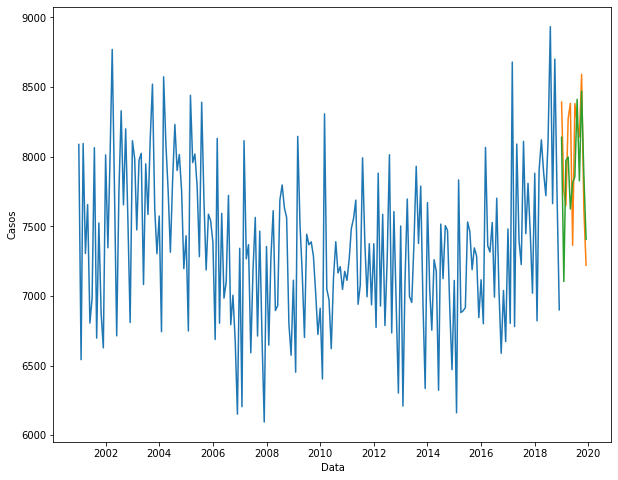

In [ ]:
dados_treino = dados_st.query('Ano != 2019')
dados_teste = dados_st.query('Ano == 2019')

modelo_arima = ARIMA(dados_treino['Casos'].values.astype('float32'), order=[12,1,0])
modelo_arima_treinado = modelo_arima.fit()


dados_teste['previsao'] = modelo_arima_treinado.forecast(12)[0]

plt.figure(figsize=(10,8))
sns.lineplot(x='Data', y='Casos', data=dados_treino)
sns.lineplot(x='Data', y='Casos', data=dados_teste)
sns.lineplot(x='Data', y='previsao', data=dados_teste);

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:

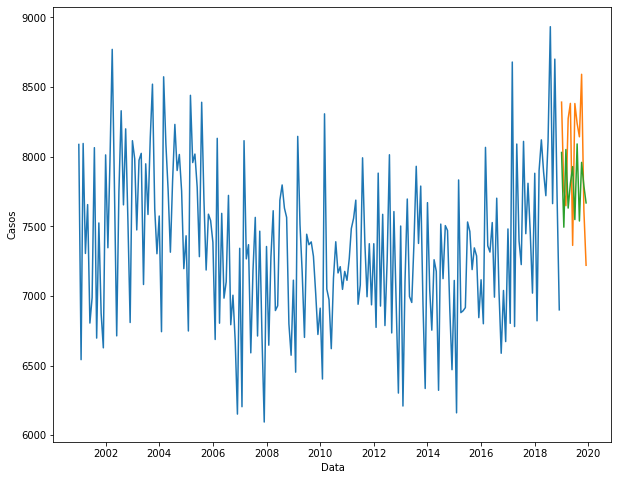

In [ ]:
dados_treino = dados_st.query('Ano != 2019')
dados_teste = dados_st.query('Ano == 2019')

modelo_arima = ARIMA(dados_treino['Casos'].values.astype('float32'), order=[3,1,3])
modelo_arima_treinado = modelo_arima.fit()


dados_teste['previsao'] = modelo_arima_treinado.forecast(12)[0]

plt.figure(figsize=(10,8))
sns.lineplot(x='Data', y='Casos', data=dados_treino)
sns.lineplot(x='Data', y='Casos', data=dados_teste)
sns.lineplot(x='Data', y='previsao', data=dados_teste);

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

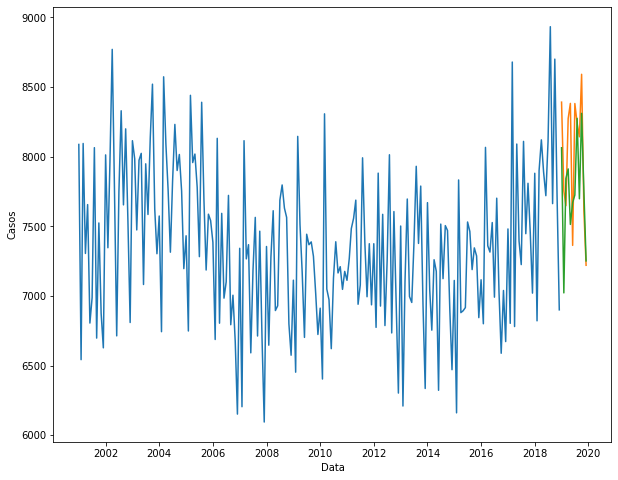

In [ ]:
dados_treino = dados_st.query('Ano != 2019')
dados_teste = dados_st.query('Ano == 2019')

modelo_arima = ARIMA(dados_treino['Casos'].values.astype('float32'), order=[12,0,2])
modelo_arima_treinado = modelo_arima.fit()


dados_teste['previsao'] = modelo_arima_treinado.forecast(12)[0]

plt.figure(figsize=(10,8))
sns.lineplot(x='Data', y='Casos', data=dados_treino)
sns.lineplot(x='Data', y='Casos', data=dados_teste)
sns.lineplot(x='Data', y='previsao', data=dados_teste);

#### Desafio 10 - Parâmetros da função ARIMA.Forecast()

Na tupla de retorno do forecast (arima), estudar o que são os elementos 1 e 2 da tupla. Tentar plotar junto com gráfico.

    def forecast(self, steps=1, exog=None, alpha=.05):
        Returns
        -------
        forecast : array
            Array of out of sample forecasts
        stderr : array
            Array of the standard error of the forecasts.
        conf_int : array
            2d array of the confidence interval for the forecast
  

Segundo a documentação da função, os parâmetros são:

    * forecast: array contendo a previsão
    * stderr: array contendo o desvio padrão das previões
    * conf_int: array de 2 dimensões contendo o intervalo de confiança de cada previsão.

In [ ]:
def plot_previsao(dados_treino, dados_teste, y, titulo, steps=12, p=0, d=0, q=0, com_std=False):
    modelo_arima = ARIMA(dados_treino[y].values.astype('float64'), order=[p,d,q])
    modelo_arima_treinado = modelo_arima.fit()
    previsao = modelo_arima_treinado.forecast(steps=steps)

    aux = dados_teste.copy()
    aux['previsao'] = previsao[0]
    aux['desvio_padrao'] = previsao[1]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=dados_treino['Data'], y=dados_treino[y],
                             name=y, mode='lines+markers'))    
    fig.add_trace(go.Scatter(x=aux['Data'], y=aux[y], name=f'{y} - Teste'))
    fig.add_trace(go.Scatter(x=aux['Data'], y=aux['previsao'],
                             name=f'{y} - Previsão', mode='lines+markers'))
    
    if com_std:
        fig.add_trace(go.Scatter(x=aux['Data'],
                                y=aux['previsao']+aux['desvio_padrao'],
                                mode='lines', marker=dict(color="#444"),
                                line=dict(width=0), showlegend=False))

        fig.add_trace(go.Scatter(x=aux['Data'],
                                 y=aux['previsao']-aux['desvio_padrao'],
                                 marker=dict(color="#444"), line=dict(width=0),
                                 mode='lines', fillcolor='rgba(68, 68, 68, 0.3)',
                                 fill='tonexty',
                                 showlegend=False))
    
    fig.update_layout(
        title = f'Previsão - <b>{titulo}</b>',
        title_font = dict(size=18),

        template = 'plotly_white',
        autosize = False,
        width = 1000,
        height = 600,
    )
    fig.update_xaxes(dtick="M6", tickformat="%b\n%Y", ticklabelmode="period")

    fig.show()

In [ ]:
dados_hans_st['Mês'] = dados_hans_st.index.month
dados_hans_st['Ano'] = dados_hans_st.index.year
dados_hans_st.head()

,Casos,Média Móvel Trimestral,Média Móvel Semestral,Média Móvel Anual,Mês,Ano
Data,,,,,,
2001-01-01,4107.0,NaN,NaN,NaN,1,2001
2001-02-01,4103.0,4332.333333,NaN,NaN,2,2001
2001-03-01,4787.0,4341.666667,NaN,NaN,3,2001
2001-04-01,4135.0,4548.666667,4299.333333,NaN,4,2001
2001-05-01,4724.0,4266.333333,4300.833333,NaN,5,2001


In [ ]:
dados_hans_st.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 231 entries, 2001-01-01 to 2020-03-01
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Casos                   231 non-null    float64
 1   Média Móvel Trimestral  226 non-null    float64
 2   Média Móvel Semestral   223 non-null    float64
 3   Média Móvel Anual       217 non-null    float64
 4   Mês                     231 non-null    int64  
 5   Ano                     231 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 22.6 KB


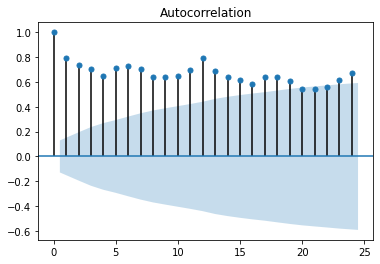

In [ ]:
plot_acf(dados_hans_st['Casos']);

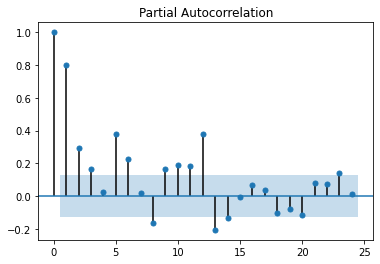

In [ ]:
plot_pacf(dados_hans_st['Casos']);

In [ ]:
dados_treino_hans = dados_hans_st.query('(Ano < 2019) or (Ano == 2019 and Mês == 1)').reset_index()
dados_teste_hans = dados_hans_st.query('Ano >= 2019').reset_index()

plot_previsao(dados_treino_hans, dados_teste_hans, y='Casos',
              titulo='Casos de Hanseníase', steps=15, p=9, d=1, q=3, com_std=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.m

#### Desafio 11 - ARIMA para os Passageiros

Utilizar o ARIMA para base de dados de passageiros e modificar os parâmetros order.

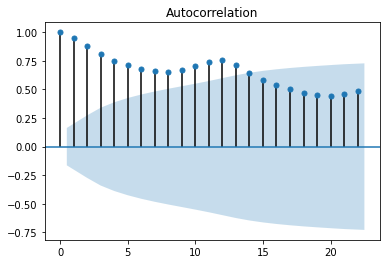

In [ ]:
plot_acf(dados_passageiros['Passageiros']);

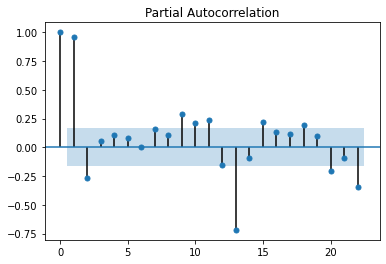

In [ ]:
plot_pacf(dados_passageiros['Passageiros']);

In [ ]:
dados_passageiros['Ano'].unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960])

In [ ]:
dados_treino_p = dados_passageiros.query('(Ano != 1960) or (Ano == 1960 and Mês == 1)')
dados_teste_p = dados_passageiros.query('Ano == 1960')

# parâmetros
p = 8     # parâmetro da ACF
d = 1     # parâmetro para indicar se uma série é não estacionária (que oscila em torno de um valor fixo)
q = 1     # parâmetro da PACF

plot_previsao(dados_treino_p, dados_teste_p, y='Passageiros', steps=12,
              titulo='Número de Passageiros', p=p, d=d, q=q, com_std=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.m

### Desafio 12 - Séries Diferenciadas

Calcular série temporal diferenciada de 1 e 2 ordem e plotar os gráficos destas séries para verificar o efeito do parâmetro de diferenciação do ARIMA (dica: diff do pandas).

In [ ]:
dados_passageiros.head()

,Data,Passageiros,Mês,Ano
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949


In [ ]:
dados_passageiros.tail()

,Data,Passageiros,Mês,Ano
139,1960-08-01,606,8,1960
140,1960-09-01,508,9,1960
141,1960-10-01,461,10,1960
142,1960-11-01,390,11,1960
143,1960-12-01,432,12,1960


In [ ]:
dados_passageiros['Diff'] = dados_passageiros['Passageiros'].diff()
dados_passageiros.head()

,Data,Passageiros,Mês,Ano,Diff
0,1949-01-01,112,1,1949,NaN
1,1949-02-01,118,2,1949,6.0
2,1949-03-01,132,3,1949,14.0
3,1949-04-01,129,4,1949,-3.0
4,1949-05-01,121,5,1949,-8.0


In [ ]:
dados_passageiros['Diff 2'] = dados_passageiros['Diff'].diff()
dados_passageiros.head()

,Data,Passageiros,Mês,Ano,Diff,Diff 2
0,1949-01-01,112,1,1949,NaN,NaN
1,1949-02-01,118,2,1949,6.0,NaN
2,1949-03-01,132,3,1949,14.0,8.0
3,1949-04-01,129,4,1949,-3.0,-17.0
4,1949-05-01,121,5,1949,-8.0,-5.0


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=dados_passageiros['Data'],
                         y=dados_passageiros['Passageiros'],
                         name='Passageiros'))

fig.add_trace(go.Scatter(x=dados_passageiros['Data'],
                         y=dados_passageiros['Diff'],
                         name='Diff'))

fig.add_trace(go.Scatter(x=dados_passageiros['Data'],
                         y=dados_passageiros['Diff 2'],
                         name='Diff 2'))

fig.update_layout(
    template = 'plotly_white',
    autosize = False,
    width = 800,
    height = 600,
)

fig.show()

## Parte 06 - AUTOARIMA e Prophet


In [ ]:
modelo_autoarima = auto_arima(dados_treino['Casos'].values, error_action='ignore',
                              trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3462.510, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3366.610, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3312.298, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3460.524, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3309.482, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3310.770, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3311.065, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3310.088, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3344.652, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3307.835, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3310.594, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3364.610, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3309.098, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [ ]:
modelo_autoarima.predict(12)

array([7945.87236724, 7778.65152982, 7805.38787867, 7801.11309832,
       7801.79657785, 7801.68729872, 7801.70477097, 7801.7019774 ,
       7801.70242405, 7801.70235264, 7801.70236406, 7801.70236223])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



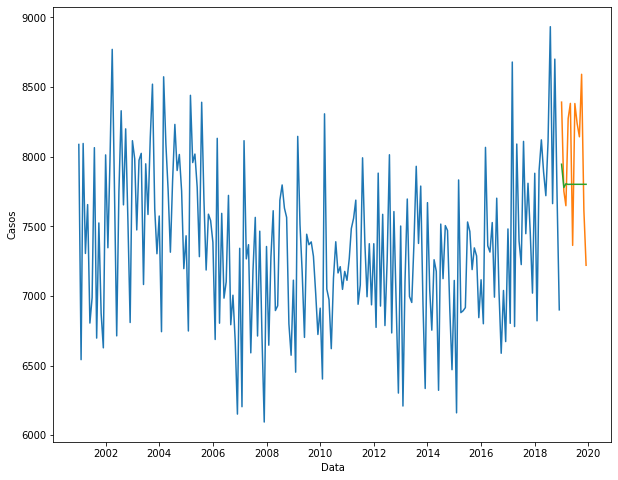

In [ ]:
dados_teste['previsao_autoarima'] = modelo_autoarima.predict(12)

plt.figure(figsize=(10,8))
sns.lineplot(x='Data', y='Casos', data=dados_treino)
sns.lineplot(x='Data', y='Casos', data=dados_teste)
sns.lineplot(x='Data', y='previsao_autoarima', data=dados_teste);

In [ ]:
modelo_autoarima = auto_arima(dados_treino['Casos'].values, error_action='ignore',
                              trace=True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3462.510, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3289.199, Time=0.32 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3249.086, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3460.524, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3312.298, Time=0.15 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3246.454, Time=1.71 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=3.34 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3398.593, Time=1.04 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=3242.479, Time=2.07 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3246.995, Time=0.79 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=3198.483, Time=3.10 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.78 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



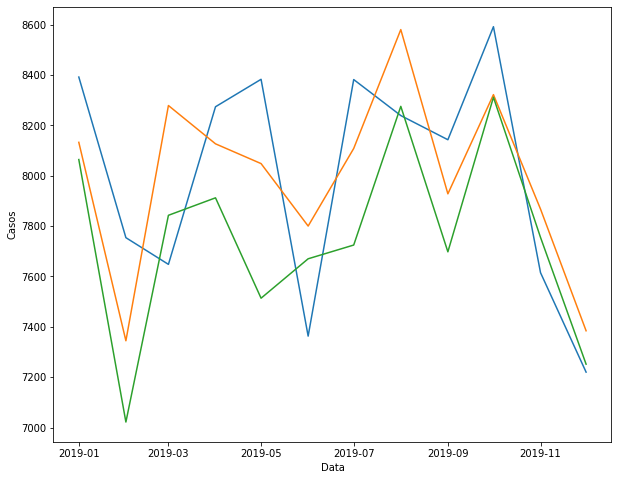

In [ ]:
dados_teste['previsao_autoarima'] = modelo_autoarima.predict(12)

plt.figure(figsize=(10,8))
#sns.lineplot(x='Data', y='Casos', data=dados_treino)
sns.lineplot(x='Data', y='Casos', data=dados_teste)
sns.lineplot(x='Data', y='previsao_autoarima', data=dados_teste)
sns.lineplot(x='Data', y='previsao', data=dados_teste);

In [ ]:
resultado_autoarima = mean_squared_error(dados_teste['Casos'], dados_teste['previsao_autoarima'])
resultado_arima = mean_squared_error(dados_teste['Casos'], dados_teste['previsao'])

print(f'Autoarima = {resultado_autoarima}')
print(f'Arima = {resultado_arima}')

Autoarima = 113249.88122700033
Arima = 199447.8131210194


In [ ]:
modelo_profeta = Prophet(seasonality_mode='multiplicative')

mapa = {'Data':'ds', 'Passageiros': 'y'}
dados_treino_p_profeta = dados_treino_p[['Data', 'Passageiros']].rename(mapa, axis=1)
modelo_profeta_treinado = modelo_profeta.fit(dados_treino_p_profeta)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
futuro = modelo_profeta_treinado.make_future_dataframe(periods=12, freq='M')
futuro

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
140,1960-08-31
141,1960-09-30
142,1960-10-31
143,1960-11-30


In [ ]:
resultado_profeta = modelo_profeta_treinado.predict(futuro)
resultado_profeta

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1949-01-01,115.665652,90.466538,115.934877,115.665652,115.665652,-0.104723,-0.104723,-0.104723,-0.104723,-0.104723,-0.104723,0.0,0.0,0.0,103.552839
1,1949-02-01,117.344555,86.624040,112.209704,117.344555,117.344555,-0.152945,-0.152945,-0.152945,-0.152945,-0.152945,-0.152945,0.0,0.0,0.0,99.397285
2,1949-03-01,118.860984,106.501767,131.678519,118.860984,118.860984,0.002753,0.002753,0.002753,0.002753,0.002753,0.002753,0.0,0.0,0.0,119.188205
3,1949-04-01,120.539886,103.974997,129.019316,120.539886,120.539886,-0.033728,-0.033728,-0.033728,-0.033728,-0.033728,-0.033728,0.0,0.0,0.0,116.474361
4,1949-05-01,122.164631,105.679621,131.195210,122.164631,122.164631,-0.028318,-0.028318,-0.028318,-0.028318,-0.028318,-0.028318,0.0,0.0,0.0,118.705226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1960-08-31,470.152041,478.373327,501.726439,469.434927,470.851834,0.039996,0.039996,0.039996,0.039996,0.039996,0.039996,0.0,0.0,0.0,488.956328
141,1960-09-30,472.935700,416.411707,441.696137,472.069977,473.772414,-0.093619,-0.093619,-0.093619,-0.093619,-0.093619,-0.093619,0.0,0.0,0.0,428.659862
142,1960-10-31,475.812148,361.352772,387.417889,474.782251,476.840027,-0.213819,-0.213819,-0.213819,-0.213819,-0.213819,-0.213819,0.0,0.0,0.0,374.074684
143,1960-11-30,478.595807,411.087285,437.167870,477.409137,479.807408,-0.112862,-0.112862,-0.112862,-0.112862,-0.112862,-0.112862,0.0,0.0,0.0,424.580290


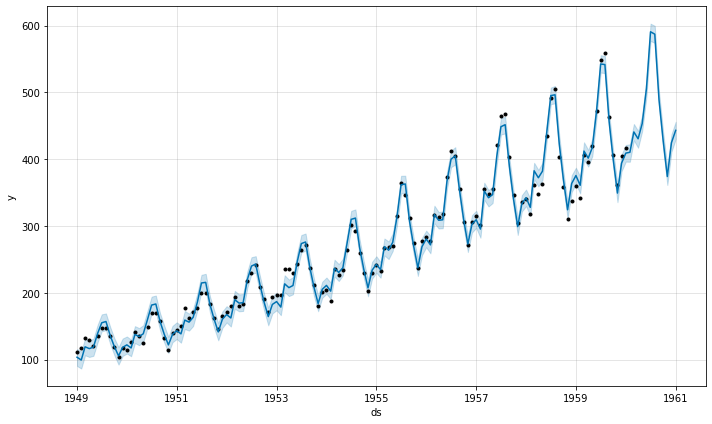

In [ ]:
modelo_profeta_treinado.plot(resultado_profeta);

#### Desafio 13 - AUTOARIMA com max_p e max_q

Variar os parâmetros de max_p/q para ver se varia o melhor modelo (*best_model*).

In [ ]:
modelo_autoarima_with_max_p = auto_arima(dados_treino['Casos'].values, error_action='ignore',
                              trace=True, seasonal=True, m=12, max_p=12)

dados_teste['previsao_autoarima_with_max_p'] = modelo_autoarima_with_max_p.predict(12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.56 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3462.510, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3289.199, Time=0.32 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3249.086, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3460.524, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3312.298, Time=0.15 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3246.454, Time=1.62 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=3.26 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3398.593, Time=1.01 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=3242.479, Time=2.10 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3246.995, Time=0.79 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=3198.483, Time=3.08 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
modelo_autoarima_with_max_q = auto_arima(dados_treino['Casos'].values, error_action='ignore',
                              trace=True, seasonal=True, m=12, max_q=12)

dados_teste['previsao_autoarima_with_max_q'] = modelo_autoarima_with_max_q.predict(12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3462.510, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3289.199, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3249.086, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3460.524, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3312.298, Time=0.15 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3246.454, Time=1.63 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=3.41 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3398.593, Time=1.06 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=3242.479, Time=2.09 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3246.995, Time=0.79 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=3198.483, Time=3.15 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.77 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
resultado_autoarima_with_maxp = mean_squared_error(dados_teste['Casos'], dados_teste['previsao_autoarima_with_max_p'])
resultado_autoarima_with_maxq = mean_squared_error(dados_teste['Casos'], dados_teste['previsao_autoarima_with_max_q'])
resultado_autoarima = mean_squared_error(dados_teste['Casos'], dados_teste['previsao_autoarima'])

print(f'Autoarima = {resultado_autoarima}')
print(f'Autoarima com max P = {resultado_autoarima_with_maxp}')
print(f'Autoarima com max Q = {resultado_autoarima_with_maxq}')

Autoarima = 113249.88122700033
Autoarima com max P = 113249.88122700033
Autoarima com max Q = 113249.88122700033


Como vimos acima, mesmo variando os parâmetros max_p e max_q, o '*best model*' permanece o mesmo com os mesmos resultados quando comparados utilizando o método '*mean_squared_error*'.

#### Desafio 14 - AUTOARIMA para Passageiros e Casos de Hanseníase

Plotar autoarima para dados de passageiros e casos de hanseníase.

In [158]:
def plot_previsao_with_autoarima(dados_treino, dados_teste, y, titulo, steps=12):
    modelo_autoarima = auto_arima(dados_treino[y].values, error_action='ignore',
                              trace=False, seasonal=True, m=12)
    previsao = modelo_autoarima.predict(steps)

    aux = dados_teste.copy()
    aux['previsao'] = previsao

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=dados_treino['Data'], y=dados_treino[y],
                             name=y, mode='lines', marker_color='grey'))    
    fig.add_trace(go.Scatter(x=aux['Data'], y=aux[y], name=f'{y} - Teste',
                             mode='lines+markers', marker_color='grey'))
    fig.add_trace(go.Scatter(x=aux['Data'], y=aux['previsao'],
                             name=f'{y} - Previsão', mode='lines+markers',
                             marker_color='orange'))
        

    fig.update_layout(
        title = f'Previsão - <b>{titulo}</b>',
        title_font = dict(size=18),

        template = 'plotly_white',
        autosize = False,
        width = 900,
        height = 400,
        
        legend=dict(title='', orientation="h", y=0.96,
                yanchor="bottom", xanchor="right", x = 1),
    )
    fig.update_xaxes(dtick="M6", tickformat="%b\n%Y", ticklabelmode="period")

    fig.show()

In [159]:
plot_previsao_with_autoarima(dados_treino_p, dados_teste_p, y='Passageiros',
                             titulo='Número de Passageiros')

In [160]:
plot_previsao_with_autoarima(dados_treino_hans, dados_teste_hans, y='Casos',
                             titulo='Casos de Hanseníase', steps=15)

#### Desafio 15 - Profeta para os Casos de Tuberculose

Plotar os valores reais e valores previstos pelo 'profeta'. Fazer a mesma análise para os dados de tuberculose.

In [164]:
modelo_profeta = Prophet()
#modelo_profeta = Prophet(seasonality_mode='multiplicative')

mapa = {'Data':'ds', 'Casos': 'y'}
dados_treino_profeta = dados_treino[['Data', 'Casos']].rename(mapa, axis=1)
modelo_profeta_treinado = modelo_profeta.fit(dados_treino_profeta)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [165]:
futuro = modelo_profeta_treinado.make_future_dataframe(periods=12, freq='M')
resultado_profeta = modelo_profeta_treinado.predict(futuro)
resultado_profeta

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,7684.763070,7376.621393,8316.359832,7684.763070,7684.763070,161.615774,161.615774,161.615774,161.615774,161.615774,161.615774,0.0,0.0,0.0,7846.378843
1,2001-02-01,7682.120506,6462.318606,7405.121931,7682.120506,7682.120506,-757.677450,-757.677450,-757.677450,-757.677450,-757.677450,-757.677450,0.0,0.0,0.0,6924.443056
2,2001-03-01,7679.733674,7768.380251,8719.513284,7679.733674,7679.733674,558.130684,558.130684,558.130684,558.130684,558.130684,558.130684,0.0,0.0,0.0,8237.864358
3,2001-04-01,7677.091111,7298.778170,8246.282707,7677.091111,7677.091111,97.631059,97.631059,97.631059,97.631059,97.631059,97.631059,0.0,0.0,0.0,7774.722169
4,2001-05-01,7674.533791,7278.277422,8234.575207,7674.533791,7674.533791,80.211586,80.211586,80.211586,80.211586,80.211586,80.211586,0.0,0.0,0.0,7754.745377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2019-07-31,7848.268201,7482.751660,8389.971674,7844.207908,7853.292175,93.267135,93.267135,93.267135,93.267135,93.267135,93.267135,0.0,0.0,0.0,7941.535336
224,2019-08-31,7860.467650,7423.642781,8368.831427,7855.087705,7866.622408,16.394642,16.394642,16.394642,16.394642,16.394642,16.394642,0.0,0.0,0.0,7876.862292
225,2019-09-30,7872.273568,7835.592346,8734.232669,7865.811923,7879.849181,410.366374,410.366374,410.366374,410.366374,410.366374,410.366374,0.0,0.0,0.0,8282.639942
226,2019-10-31,7884.473017,7209.932429,8148.169197,7876.632896,7892.766810,-201.549107,-201.549107,-201.549107,-201.549107,-201.549107,-201.549107,0.0,0.0,0.0,7682.923910


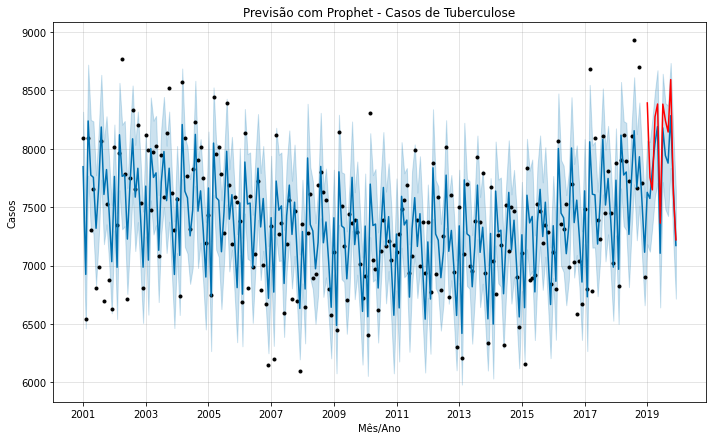

In [170]:
fig = modelo_profeta_treinado.plot(resultado_profeta, ylabel='Casos', xlabel='Mês/Ano')
fig.axes[0].plot('Data', 'Casos', data=dados_teste, color='red')
plt.title('Previsão com Prophet - Casos de Tuberculose')
plt.show()